In [1]:
import os
import sys
import itertools
import numpy as np

import torch
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

sys.path.append("/home/self_supervised_learning_gr/self_supervised_learning/dev/ProjetCassiopee")
from src.setup import setup_python, setup_pytorch
from src.transformation import RandomCrop, ObjectCrop
from src.dataset import RGBDObjectDataset, RGBDObjectDataset_Supervised_Contrast, RGBDObjectDataset_Unsupervised_Contrast

/home/self_supervised_learning_gr/self_supervised_learning/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
setup_python()

In [3]:
setup_pytorch()

device(type='cuda', index=0)

In [4]:
INPUT_SIZE = (256,256)
# TRANSFORMATION = transforms.Compose(
#         [transforms.ToTensor(),
#          transforms.Resize(size=INPUT_SIZE)])
TRANSFORMATION = transforms.Compose(
        [transforms.ToTensor()])
# CROP_TRANSFORMATION = RandomCrop(output_size=INPUT_SIZE,
#                                  offset_range=(-128, 0))
CROP_TRANSFORMATION = ObjectCrop(output_size=INPUT_SIZE,
                                 padding=(20,20),
                                 offset_range=(-10, 10))

# RGBDObjectDataset

In [14]:
dataset = RGBDObjectDataset(path="rgbd-dataset",
                            mode="train",
                            class_names=["apple", "banana"],
                            modalities=["rgb", "depth", "mask", "loc"],
                            transformation=None,
                            crop_transformation=CROP_TRANSFORMATION,
                            nb_max_samples=20)

In [15]:
len(dataset)

20

In [16]:
print(dataset.class_dict)

{'apple': 0, 'ball': 1, 'banana': 2, 'bell_pepper': 3, 'binder': 4, 'bowl': 5, 'calculator': 6, 'camera': 7, 'cap': 8, 'cell_phone': 9, 'cereal_box': 10, 'coffee_mug': 11, 'comb': 12, 'dry_battery': 13, 'flashlight': 14, 'food_bag': 15, 'food_box': 16, 'food_can': 17, 'food_cup': 18, 'food_jar': 19, 'garlic': 20, 'glue_stick': 21, 'greens': 22, 'hand_towel': 23, 'instant_noodles': 24, 'keyboard': 25, 'kleenex': 26, 'lemon': 27, 'lightbulb': 28, 'lime': 29, 'marker': 30, 'mushroom': 31, 'notebook': 32, 'onion': 33, 'orange': 34, 'peach': 35, 'pear': 36, 'pitcher': 37, 'plate': 38, 'pliers': 39, 'potato': 40, 'rubber_eraser': 41, 'scissors': 42, 'shampoo': 43, 'soda_can': 44, 'sponge': 45, 'stapler': 46, 'tomato': 47, 'toothbrush': 48, 'toothpaste': 49, 'water_bottle': 50}


In [17]:
print(len(dataset.x))
print(dataset.x[:10])

20
['banana_1_2_191' 'apple_3_2_112' 'apple_4_1_157' 'apple_5_2_185'
 'banana_1_2_118' 'banana_1_2_58' 'banana_1_1_176' 'apple_1_1_141'
 'banana_4_1_70' 'apple_4_1_129']


In [18]:
print(len(dataset.y))
print(dataset.y[:10])

20
[2 0 0 0 2 2 2 0 2 0]


In [19]:
data_loader = DataLoader(dataset,
                         batch_size=2,
                         shuffle=False)

In [20]:
len(data_loader)

10

In [21]:
data_iter = iter(data_loader)

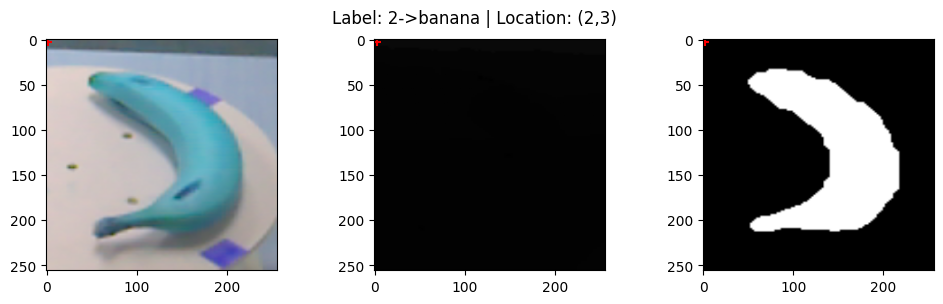

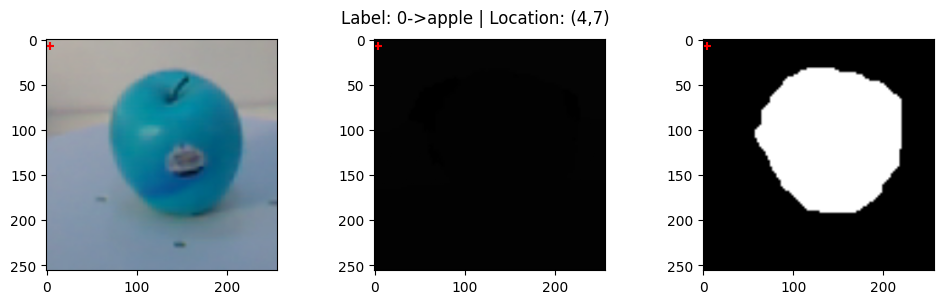

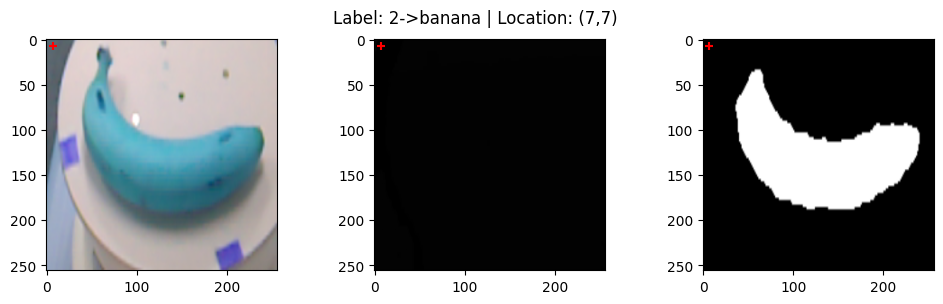

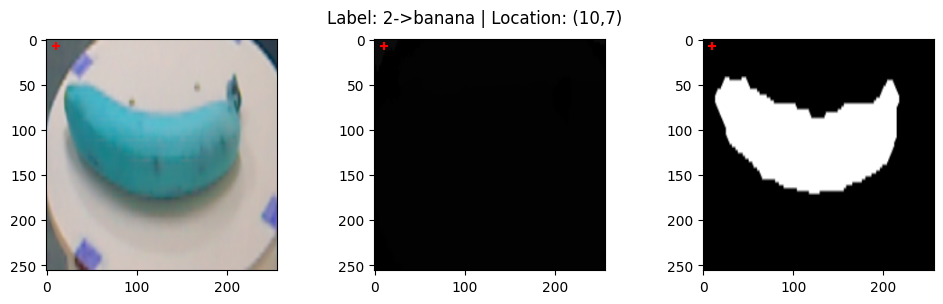

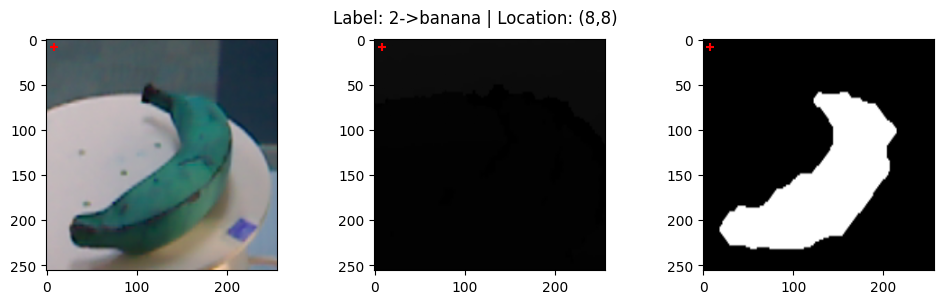

In [22]:
for i, batch in enumerate(data_iter):
    # print(i)
    batch_rgb, batch_depth, batch_mask, batch_loc_x, batch_loc_y, batch_label = batch
    rgb, depth, mask, loc_x, loc_y, label = batch_rgb[0], batch_depth[0], batch_mask[0], batch_loc_x[0], batch_loc_y[0], batch_label[0]
    
    fig, axs = plt.subplots(1, 3, figsize=(12,3))
    axs[0].imshow(rgb.permute(1, 2, 0))
    axs[0].scatter([loc_x], [loc_y], marker="+", c="red")
    axs[1].imshow(depth.permute(1, 2, 0))
    axs[1].scatter([loc_x], [loc_y], marker="+", c="red")
    axs[2].imshow(mask.permute(1, 2, 0))
    axs[2].scatter([loc_x], [loc_y], marker="+", c="red")
    fig.suptitle(f"Label: {label}->{list(dataset.class_dict)[label]} | Location: ({loc_x},{loc_y})")
    
    if i == 4:
        break

In [ ]:
for i, batch in enumerate(itertools.islice(data_iter, len(data_loader))):
    # print(i)
    batch_rgb, batch_depth, batch_mask, batch_loc_x, batch_loc_y, batch_label = batch
    rgb, depth, mask, loc_x, loc_y, label = batch_rgb[0], batch_depth[0], batch_mask[0], batch_loc_x[0], batch_loc_y[0], batch_label[0]
    
    fig, axs = plt.subplots(1, 3, figsize=(12,3))
    axs[0].imshow(rgb.permute(1, 2, 0))
    axs[1].imshow(depth.permute(1, 2, 0))
    axs[2].imshow(mask.permute(1, 2, 0))
    fig.suptitle(f"Label: {label}->{list(dataset.class_dict)[label]} | Location: ({loc_x},{loc_y})")

In [ ]:
test = next(iter(data_loader))
print(type(test))
print(len(test))

In [ ]:
# Retrieve batch data
batch_rgb, batch_depth, batch_mask, batch_loc_x, batch_loc_y, batch_label = next(iter(data_loader))
print(type(batch_rgb))
print(type(batch_depth))
print(type(batch_mask))
print(type(batch_loc_x))
print(type(batch_loc_y))
print(type(batch_label))
print(f"RGB batch shape: {batch_rgb.shape}")
print(f"Labels batch shape: {batch_label.shape}")

In [ ]:
# Retrieve individual data
rgb, depth, mask, loc_x, loc_y, label = batch_rgb[0], batch_depth[0], batch_mask[0], batch_loc_x[0], batch_loc_y[0], batch_label[0]

In [ ]:
print(rgb.size())
fig, axs = plt.subplots(1, 3, figsize=(12,3))
axs[0].imshow(rgb.permute(1, 2, 0))
axs[0].scatter([loc_x], [loc_y], marker="+", c="red")
axs[1].imshow(depth.permute(1, 2, 0))
axs[1].scatter([loc_x], [loc_y], marker="+", c="red")
axs[2].imshow(mask.permute(1, 2, 0))
axs[2].scatter([loc_x], [loc_y], marker="+", c="red")
fig.suptitle(f"Label: {label}->{list(dataset.class_dict)[label]} | Location: ({loc_x},{loc_y})")

## Crop transformation test

In [ ]:
crop_rgb, crop_depth, crop_mask, crop_loc_x, crop_loc_y = CROP_TRANSFORMATION(rgb, depth, mask, loc_x, loc_y)
print(crop_rgb.size())
fig, axs = plt.subplots(1, 3, figsize=(12,3))
axs[0].imshow(crop_rgb.permute(1, 2, 0))
axs[0].scatter([crop_loc_x], [crop_loc_y], marker="+", c="red")
axs[1].imshow(crop_depth.permute(1, 2, 0))
axs[1].scatter([crop_loc_x], [crop_loc_y], marker="+", c="red")
axs[2].imshow(crop_mask.permute(1, 2, 0))
axs[2].scatter([crop_loc_x], [crop_loc_y], marker="+", c="red")
fig.suptitle(f"Label: {label}->{list(dataset.class_dict)[label]} | Location: ({crop_loc_x},{crop_loc_y})")

# RGBDObjectDataset_Supervised_Contrastive

In [ ]:
dataset_supervised_contrast = RGBDObjectDataset_Supervised_Contrast(path="rgbd-dataset",
                                                                    mode="train",
                                                                    class_names=["apple", "banana"],
                                                                    modalities=["rgb", "depth", "mask", "loc"],
                                                                    transformation=TRANSFORMATION,
                                                                    crop_transformation=CROP_TRANSFORMATION,
                                                                    nb_max_samples=10)

In [ ]:
len(dataset_supervised_contrast)

In [ ]:
print(dataset_supervised_contrast.class_dict)

In [ ]:
print(len(dataset_supervised_contrast.x))
print(dataset_supervised_contrast.x[:10])

In [ ]:
print(len(dataset_supervised_contrast.y))
print(dataset_supervised_contrast.y[:10])

In [ ]:
data_loader_supervised_contrast = DataLoader(dataset_supervised_contrast,
                                             batch_size=10,
                                             shuffle=False)

In [ ]:
# Retrieve batch data
batch_p_data_1, batch_p_data_2, batch_n_data = next(iter(data_loader_supervised_contrast))
batch_p_rgb_1, batch_p_depth_1, batch_p_mask_1, batch_p_loc_x_1, batch_p_loc_y_1, batch_p_label_1 = batch_p_data_1
batch_p_rgb_2, batch_p_depth_2, batch_p_mask_2, batch_p_loc_x_2, batch_p_loc_y_2, batch_p_label_2 = batch_p_data_2
batch_n_rgb, batch_n_depth, batch_n_mask, batch_n_loc_x, batch_n_loc_y, batch_n_label = batch_n_data

In [ ]:
print(type(batch_p_rgb_1))
print(batch_p_rgb_1.shape)

In [ ]:
# Retrieve individual data
p_rgb_1, p_depth_1, p_mask_1, p_loc_x_1, p_loc_y_1, p_label_1 = batch_p_rgb_1[0], batch_p_depth_1[0], batch_p_mask_1[0], batch_p_loc_x_1[0], batch_p_loc_y_1[0], batch_p_label_1[0]
p_rgb_2, p_depth_2, p_mask_2, p_loc_x_2, p_loc_y_2, p_label_2 = batch_p_rgb_2[0], batch_p_depth_2[0], batch_p_mask_2[0], batch_p_loc_x_2[0], batch_p_loc_y_2[0], batch_p_label_2[0]
n_rgb, n_depth, n_mask, n_loc_x, n_loc_y, n_label = batch_n_rgb[0], batch_n_depth[0], batch_n_mask[0], batch_n_loc_x[0], batch_n_loc_y[0], batch_n_label[0]

In [ ]:
print(rgb.size())
fig, axs = plt.subplots(3, 3, figsize=(12,12))

axs[0,0].imshow(p_rgb_1.permute(1, 2, 0))
axs[0,0].scatter([p_loc_x_1], [p_loc_y_1], marker="+", c="red")
axs[0,1].imshow(p_depth_1.permute(1, 2, 0))
axs[0,1].scatter([p_loc_x_1], [p_loc_y_1], marker="+", c="red")
axs[0,2].imshow(p_mask_1.permute(1, 2, 0))
axs[0,2].scatter([p_loc_x_1], [p_loc_y_1], marker="+", c="red")
axs[0,0].set_title(f"Label: {p_label_1}->{list(dataset.class_dict)[p_label_1]} | Location: ({p_loc_x_1},{p_loc_y_1})")

axs[1,0].imshow(p_rgb_2.permute(1, 2, 0))
axs[1,0].scatter([p_loc_x_2], [p_loc_y_2], marker="+", c="red")
axs[1,1].imshow(p_depth_2.permute(1, 2, 0))
axs[1,1].scatter([p_loc_x_2], [p_loc_y_2], marker="+", c="red")
axs[1,2].imshow(p_mask_2.permute(1, 2, 0))
axs[1,2].scatter([p_loc_x_2], [p_loc_y_2], marker="+", c="red")
axs[1,0].set_title(f"Label: {p_label_2}->{list(dataset.class_dict)[p_label_2]} | Location: ({p_loc_x_2},{p_loc_y_2})")

axs[2,0].imshow(n_rgb.permute(1, 2, 0))
axs[2,0].scatter([n_loc_x], [n_loc_y], marker="+", c="red")
axs[2,1].imshow(n_depth.permute(1, 2, 0))
axs[2,1].scatter([n_loc_x], [n_loc_y], marker="+", c="red")
axs[2,2].imshow(n_mask.permute(1, 2, 0))
axs[2,2].scatter([n_loc_x], [n_loc_y], marker="+", c="red")
axs[2,0].set_title(f"Label: {n_label}->{list(dataset.class_dict)[n_label]} | Location: ({n_loc_x},{n_loc_y})")

# RGBDObject_Unsupervised_Contrast

In [ ]:
dataset_unsupervised_contrast = RGBDObjectDataset_Unsupervised_Contrast(path="rgbd-dataset",
                                                                        mode="train",
                                                                        class_names=["apple", "banana"],
                                                                        modalities=["rgb", "depth", "mask", "loc"],
                                                                        transformation=TRANSFORMATION,
                                                                        crop_transformation=CROP_TRANSFORMATION,
                                                                        nb_max_samples=10)

In [ ]:
len(dataset_unsupervised_contrast)

In [ ]:
print(dataset_unsupervised_contrast.class_dict)

In [ ]:
print(len(dataset_unsupervised_contrast.x))
print(dataset_unsupervised_contrast.x[:10])

In [ ]:
print(len(dataset_unsupervised_contrast.y))
print(dataset_unsupervised_contrast.y[:10])

In [ ]:
data_loader_unsupervised_contrast = DataLoader(dataset_unsupervised_contrast,
                                               batch_size=10,
                                               shuffle=False)

In [ ]:
# Retrieve batch data
batch_p_data_1, batch_p_data_2, batch_n_data = next(iter(data_loader_unsupervised_contrast))
batch_p_rgb_1, batch_p_depth_1, batch_p_mask_1, batch_p_loc_x_1, batch_p_loc_y_1, batch_p_label_1 = batch_p_data_1
batch_p_rgb_2, batch_p_depth_2, batch_p_mask_2, batch_p_loc_x_2, batch_p_loc_y_2, batch_p_label_2 = batch_p_data_2
batch_n_rgb, batch_n_depth, batch_n_mask, batch_n_loc_x, batch_n_loc_y, batch_n_label = batch_n_data

In [ ]:
print(type(batch_p_rgb_1))
print(batch_p_rgb_1.shape)

In [ ]:
# Retrieve individual data
p_rgb_1, p_depth_1, p_mask_1, p_loc_x_1, p_loc_y_1, p_label_1 = batch_p_rgb_1[0], batch_p_depth_1[0], batch_p_mask_1[0], batch_p_loc_x_1[0], batch_p_loc_y_1[0], batch_p_label_1[0]
p_rgb_2, p_depth_2, p_mask_2, p_loc_x_2, p_loc_y_2, p_label_2 = batch_p_rgb_2[0], batch_p_depth_2[0], batch_p_mask_2[0], batch_p_loc_x_2[0], batch_p_loc_y_2[0], batch_p_label_2[0]
n_rgb, n_depth, n_mask, n_loc_x, n_loc_y, n_label = batch_n_rgb[0], batch_n_depth[0], batch_n_mask[0], batch_n_loc_x[0], batch_n_loc_y[0], batch_n_label[0]

In [ ]:
print(rgb.size())
fig, axs = plt.subplots(3, 3, figsize=(12,12))

axs[0,0].imshow(p_rgb_1.permute(1, 2, 0))
axs[0,0].scatter([p_loc_x_1], [p_loc_y_1], marker="+", c="red")
axs[0,1].imshow(p_depth_1.permute(1, 2, 0))
axs[0,1].scatter([p_loc_x_1], [p_loc_y_1], marker="+", c="red")
axs[0,2].imshow(p_mask_1.permute(1, 2, 0))
axs[0,2].scatter([p_loc_x_1], [p_loc_y_1], marker="+", c="red")
axs[0,0].set_title(f"Label: {p_label_1}->{list(dataset.class_dict)[p_label_1]} | Location: ({p_loc_x_1},{p_loc_y_1})")

axs[1,0].imshow(p_rgb_2.permute(1, 2, 0))
axs[1,0].scatter([p_loc_x_2], [p_loc_y_2], marker="+", c="red")
axs[1,1].imshow(p_depth_2.permute(1, 2, 0))
axs[1,1].scatter([p_loc_x_2], [p_loc_y_2], marker="+", c="red")
axs[1,2].imshow(p_mask_2.permute(1, 2, 0))
axs[1,2].scatter([p_loc_x_2], [p_loc_y_2], marker="+", c="red")
axs[1,0].set_title(f"Label: {p_label_2}->{list(dataset.class_dict)[p_label_2]} | Location: ({p_loc_x_2},{p_loc_y_2})")

axs[2,0].imshow(n_rgb.permute(1, 2, 0))
axs[2,0].scatter([n_loc_x], [n_loc_y], marker="+", c="red")
axs[2,1].imshow(n_depth.permute(1, 2, 0))
axs[2,1].scatter([n_loc_x], [n_loc_y], marker="+", c="red")
axs[2,2].imshow(n_mask.permute(1, 2, 0))
axs[2,2].scatter([n_loc_x], [n_loc_y], marker="+", c="red")
axs[2,0].set_title(f"Label: {n_label}->{list(dataset.class_dict)[n_label]} | Location: ({n_loc_x},{n_loc_y})")